# **4th DNN**

**Thinking about**

1. Number of Epochs and when to increase them,
2. Batch Size, and effects of batch size
3. How do we know our network is not going well, comparatively, very early
4. When to add validation checks
5. Learning Rate,
6. LR schedule and concept behind it
7. When do we stop convolutions and go ahead with a larger kernel or some other alternative (which we have not yet covered)

**This is version 2.2 for Version 2.1 of 4th DNN  **

  Batch size 128
  Epoch 50
  Learning rate schedule with starting lr .01 and scheduler defined as example from session material

*Result*




installing and Importing Keras for current solution

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Ploting sample from train data set.

(60000, 28, 28)


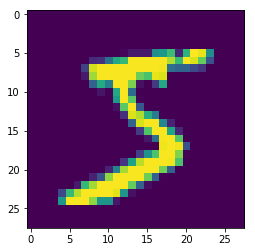

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Carrying form 4th  DNN Version 2.1

In [42]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

#Vanilla
''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
'''

#1st version 
'''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(4, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(BatchNormalization())

model.add(Convolution2D(10, 1)) #input 10,10 
model.add(BatchNormalization())

model.add(Convolution2D(10, 10)) #input 10,10
'''

#2nd version 
''''''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9


#3rd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6

model.add(Convolution2D(12, 3, 3, activation='relu')) #input 12,12 #RF 8X8
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 10)) #input 9X9
'''

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`


Printing model summary to understand current paramaters for the model. 

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_23 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_24 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_25 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 22, 16)        0         
__________

Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

Training model for 50 epoch for 128 batch size

In [46]:
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
  640/60000 [..............................] - ETA: 14s - loss: 0.1476 - acc: 0.9516

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 5s 88us/step - loss: 0.0819 - acc: 0.9745 - val_loss: 0.0566 - val_acc: 0.9823
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
60000/60000 [==============================] - 5s 81us/step - loss: 0.0527 - acc: 0.9839 - val_loss: 0.0422 - val_acc: 0.9865
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
60000/60000 [==============================] - 5s 81us/step - loss: 0.0419 - acc: 0.9869 - val_loss: 0.0373 - val_acc: 0.9875
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
60000/60000 [==============================] - 5s 80us/step - loss: 0.0369 - acc: 0.9887 - val_loss: 0.0327 - val_acc: 0.9896
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043936731.
60000/60000 [==============================] - 5s 81us/step - loss: 0.0330 - acc: 0.9892 - val_loss: 0.0318 - val_acc: 0.9897
Epoch 6/50

Epoch 00006: Le

Plotting training and validation accuracty as well as loss for every epoch

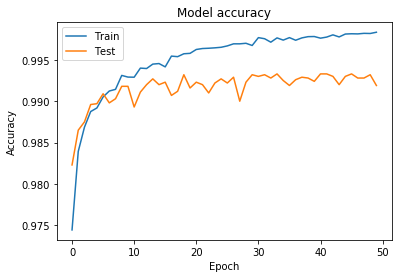

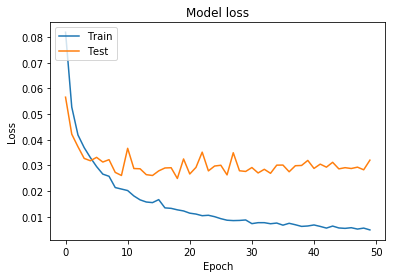

In [47]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing loss and accuracy of model test done in last step

In [49]:
print(score)

[0.03204781630953785, 0.9919]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [51]:
print(y_pred[:9])
print(y_test[:9])

[[1.84203891e-17 1.97360547e-13 6.02430822e-12 3.02960268e-10
  4.83944333e-18 1.24439728e-14 1.24292974e-24 1.00000000e+00
  1.56241720e-18 3.86677655e-14]
 [3.89605774e-17 1.09036669e-10 1.00000000e+00 2.30815703e-21
  1.77670289e-17 9.20207319e-23 2.50483770e-12 4.65408539e-17
  1.78703487e-17 2.55308237e-23]
 [1.11709972e-17 1.00000000e+00 1.37199738e-10 1.20422102e-15
  7.99569508e-11 8.03239159e-12 1.91363310e-12 6.40115461e-10
  2.67865401e-13 1.29538095e-14]
 [9.99962926e-01 1.51249927e-20 4.73350607e-14 7.75492743e-17
  4.95610591e-17 6.17779880e-15 3.70544149e-05 1.44262268e-17
  3.81846561e-15 9.14435519e-13]
 [7.32105168e-21 2.32068329e-15 1.68703918e-13 6.71525335e-21
  1.00000000e+00 4.69875149e-18 1.21267149e-14 1.39566982e-14
  4.39189023e-14 1.11931877e-08]
 [3.89989230e-18 1.00000000e+00 9.81416250e-12 7.01202091e-19
  3.79386592e-11 1.68033939e-14 1.36481768e-13 1.40342085e-08
  9.45917268e-14 2.32567380e-14]
 [1.16401211e-26 2.71699777e-14 3.14808509e-13 7.17079035e

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f761061f160>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7f76270c5588>,
 'batch_normalization_10': <keras.layers.normalization.BatchNormalization at 0x7f7610772f98>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7f76270c59e8>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7f761a753b38>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7f761a6e24e0>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7f761a618c18>,
 'batch_normalization_6': <keras.layers.normalization.BatchNormalization at 0x7f761a4405f8>,
 'batch_normalization_7': <keras.layers.normalization.BatchNormalization at 0x7f761a3ad588>,
 'batch_normalization_8': <keras.layers.normalization.BatchNormalization at 0x7f761a2b08d0>,
 'batch_normalization_9': <keras.layers.normalization.BatchNormalization at 0x7f761a1e59b0>,
 '

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()